<a href="https://colab.research.google.com/github/Sar-an/rnn-stock-price-prediction/blob/main/EX_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
38/38 [==============================] - 2s 13ms/step - loss: 0.1182
Epoch 2/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0200
Epoch 3/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0175
Epoch 4/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0170
Epoch 5/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0151
Epoch 6/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0173
Epoch 7/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0147
Epoch 8/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0152
Epoch 9/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0135
Epoch 10/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0146
Epoch 11/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0137
Epoch 12/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0120
Epoch 13/100
38/38 [=====

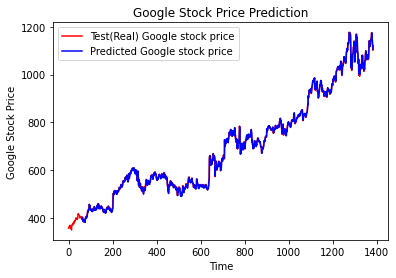

538948.108882191

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential

df_train = pd.read_csv('trainset.csv')
df_train.head(60)

train_set = df_train.iloc[:,1:2].values
train_set.shape

sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)

X_train_array = []
y_train_array = []
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)


X_train

X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))

X_train1

model = Sequential([layers.SimpleRNN(50,input_shape=(60,1)),
                    layers.Dense(1)
                    ])

model.compile(optimizer='Adam', loss='mae')

model.fit(X_train1,y_train,epochs=100,batch_size=32)

df_test=pd.read_csv("testset.csv")
test_set = df_test.iloc[:,1:2].values

dataset_total = pd.concat((df_train['Open'],df_test['Open']),axis=0)

inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
y_test = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
  y_test.append(inputs_scaled[i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error as mse
mse(y_test,predicted_stock_price)